# **1. Extração dos Dados**


In [19]:
import pandas as pd
import requests

In [20]:
# URL da API fornecida
API_URL = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

# Requisição dos dados
response = requests.get(API_URL)
response.raise_for_status()   # dispara erro se algo falhar

# Converter para JSON
data_json = response.json()

df_telecom = pd.json_normalize(data_json, sep='.')
df_telecom = pd.DataFrame(df_telecom)
df_telecom.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4


# **2. Conhecendo o Dataset**

In [21]:
df_telecom.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

# **3. Verificando Inconsistências nos Dados**

In [22]:
df_telecom.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


# **4. Tratando as Inconsistências**

In [23]:
df_telecom['account.Charges.Total'] = pd.to_numeric(
    df_telecom['account.Charges.Total'],
    errors='coerce'
)

In [24]:
df_telecom.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


# **5. Análise Descritiva**

In [25]:
# Seleciona as colunas numéricas de interesse
colunas_numericas = [
    'customer.tenure',
    'account.Charges.Monthly',
    'account.Charges.Total'
]

# Realiza a análise descritiva
analise_descritiva = df_telecom[colunas_numericas].describe().T

# Ajustando o display para melhor visualização
pd.options.display.float_format = '{:,.2f}'.format

print(analise_descritiva)

                           count     mean      std   min    25%      50%  \
customer.tenure         7,267.00    32.35    24.57  0.00   9.00    29.00   
account.Charges.Monthly 7,267.00    64.72    30.13 18.25  35.42    70.30   
account.Charges.Total   7,256.00 2,280.63 2,268.63 18.80 400.23 1,391.00   

                             75%      max  
customer.tenure            55.00    72.00  
account.Charges.Monthly    89.88   118.75  
account.Charges.Total   3,785.30 8,684.80  


# **6. Distribuição da Evasão**

### Distribuição da Variável Alvo (Churn) ###
Contagem de Clientes por Churn:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Proporção de Clientes (%):
Churn
No     71.20%
Yes    25.72%
        3.08%
Name: proportion, dtype: object


/tmp/ipython-input-2778629502.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df_telecom, palette='viridis')


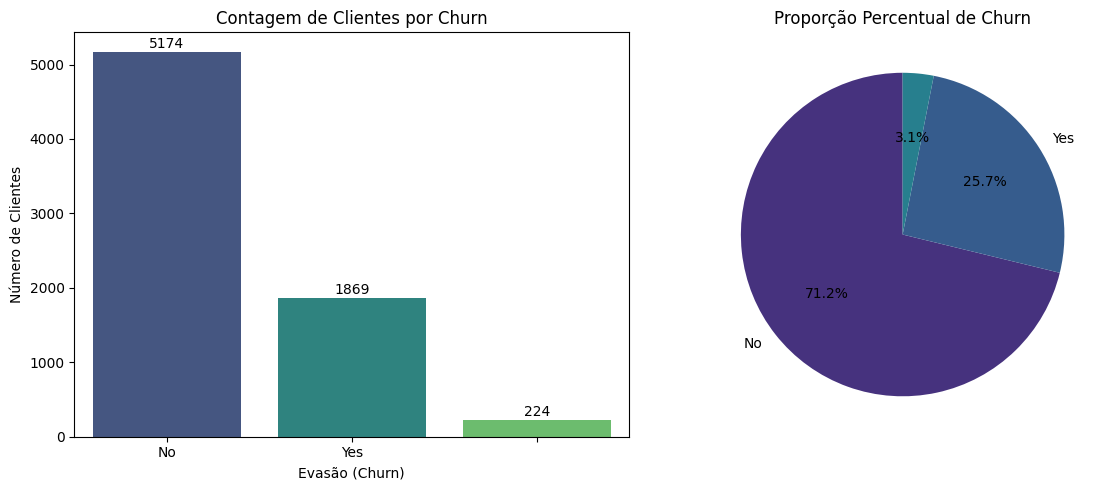

✅ Visualização da Distribuição de Churn Concluída.


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

print("### Distribuição da Variável Alvo (Churn) ###")
print("=" * 50)

# 1. Calcular Contagem e Proporção
distribuicao_churn = df_telecom['Churn'].value_counts()
proporcao_churn = df_telecom['Churn'].value_counts(normalize=True) * 100

print("Contagem de Clientes por Churn:")
print(distribuicao_churn)
print("\nProporção de Clientes (%):")
print(proporcao_churn.map('{:.2f}%'.format))
print("=" * 50)

# 2. Configuração do Gráfico
plt.figure(figsize=(12, 5))

# --- Gráfico de Barras (Count Plot) ---
plt.subplot(1, 2, 1) # 1 linha, 2 colunas, 1ª posição
sns.countplot(x='Churn', data=df_telecom, palette='viridis')
plt.title('Contagem de Clientes por Churn')
plt.xlabel('Evasão (Churn)')
plt.ylabel('Número de Clientes')

# Adiciona os rótulos de contagem nas barras
for i, count in enumerate(distribuicao_churn):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10)

# --- Gráfico de Pizza (Pie Chart) ---
plt.subplot(1, 2, 2) # 1 linha, 2 colunas, 2ª posição
plt.pie(
    distribuicao_churn,
    labels=distribuicao_churn.index,
    autopct='%1.1f%%', # Formato da porcentagem (1 casa decimal)
    startangle=90, # Começa no topo
    colors=sns.color_palette('viridis')
)
plt.title('Proporção Percentual de Churn')

plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

print("✅ Visualização da Distribuição de Churn Concluída.")

# **7. Contagem de Evasão por Variáveis Categóricas**

In [27]:
# Lista das colunas categóricas de interesse, excluindo 'customerID'
colunas_categoricas = [
    'customer.gender',
    'customer.SeniorCitizen',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'phone.MultipleLines',
    'internet.InternetService',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.Contract',
    'account.PaperlessBilling',
    'account.PaymentMethod'
]

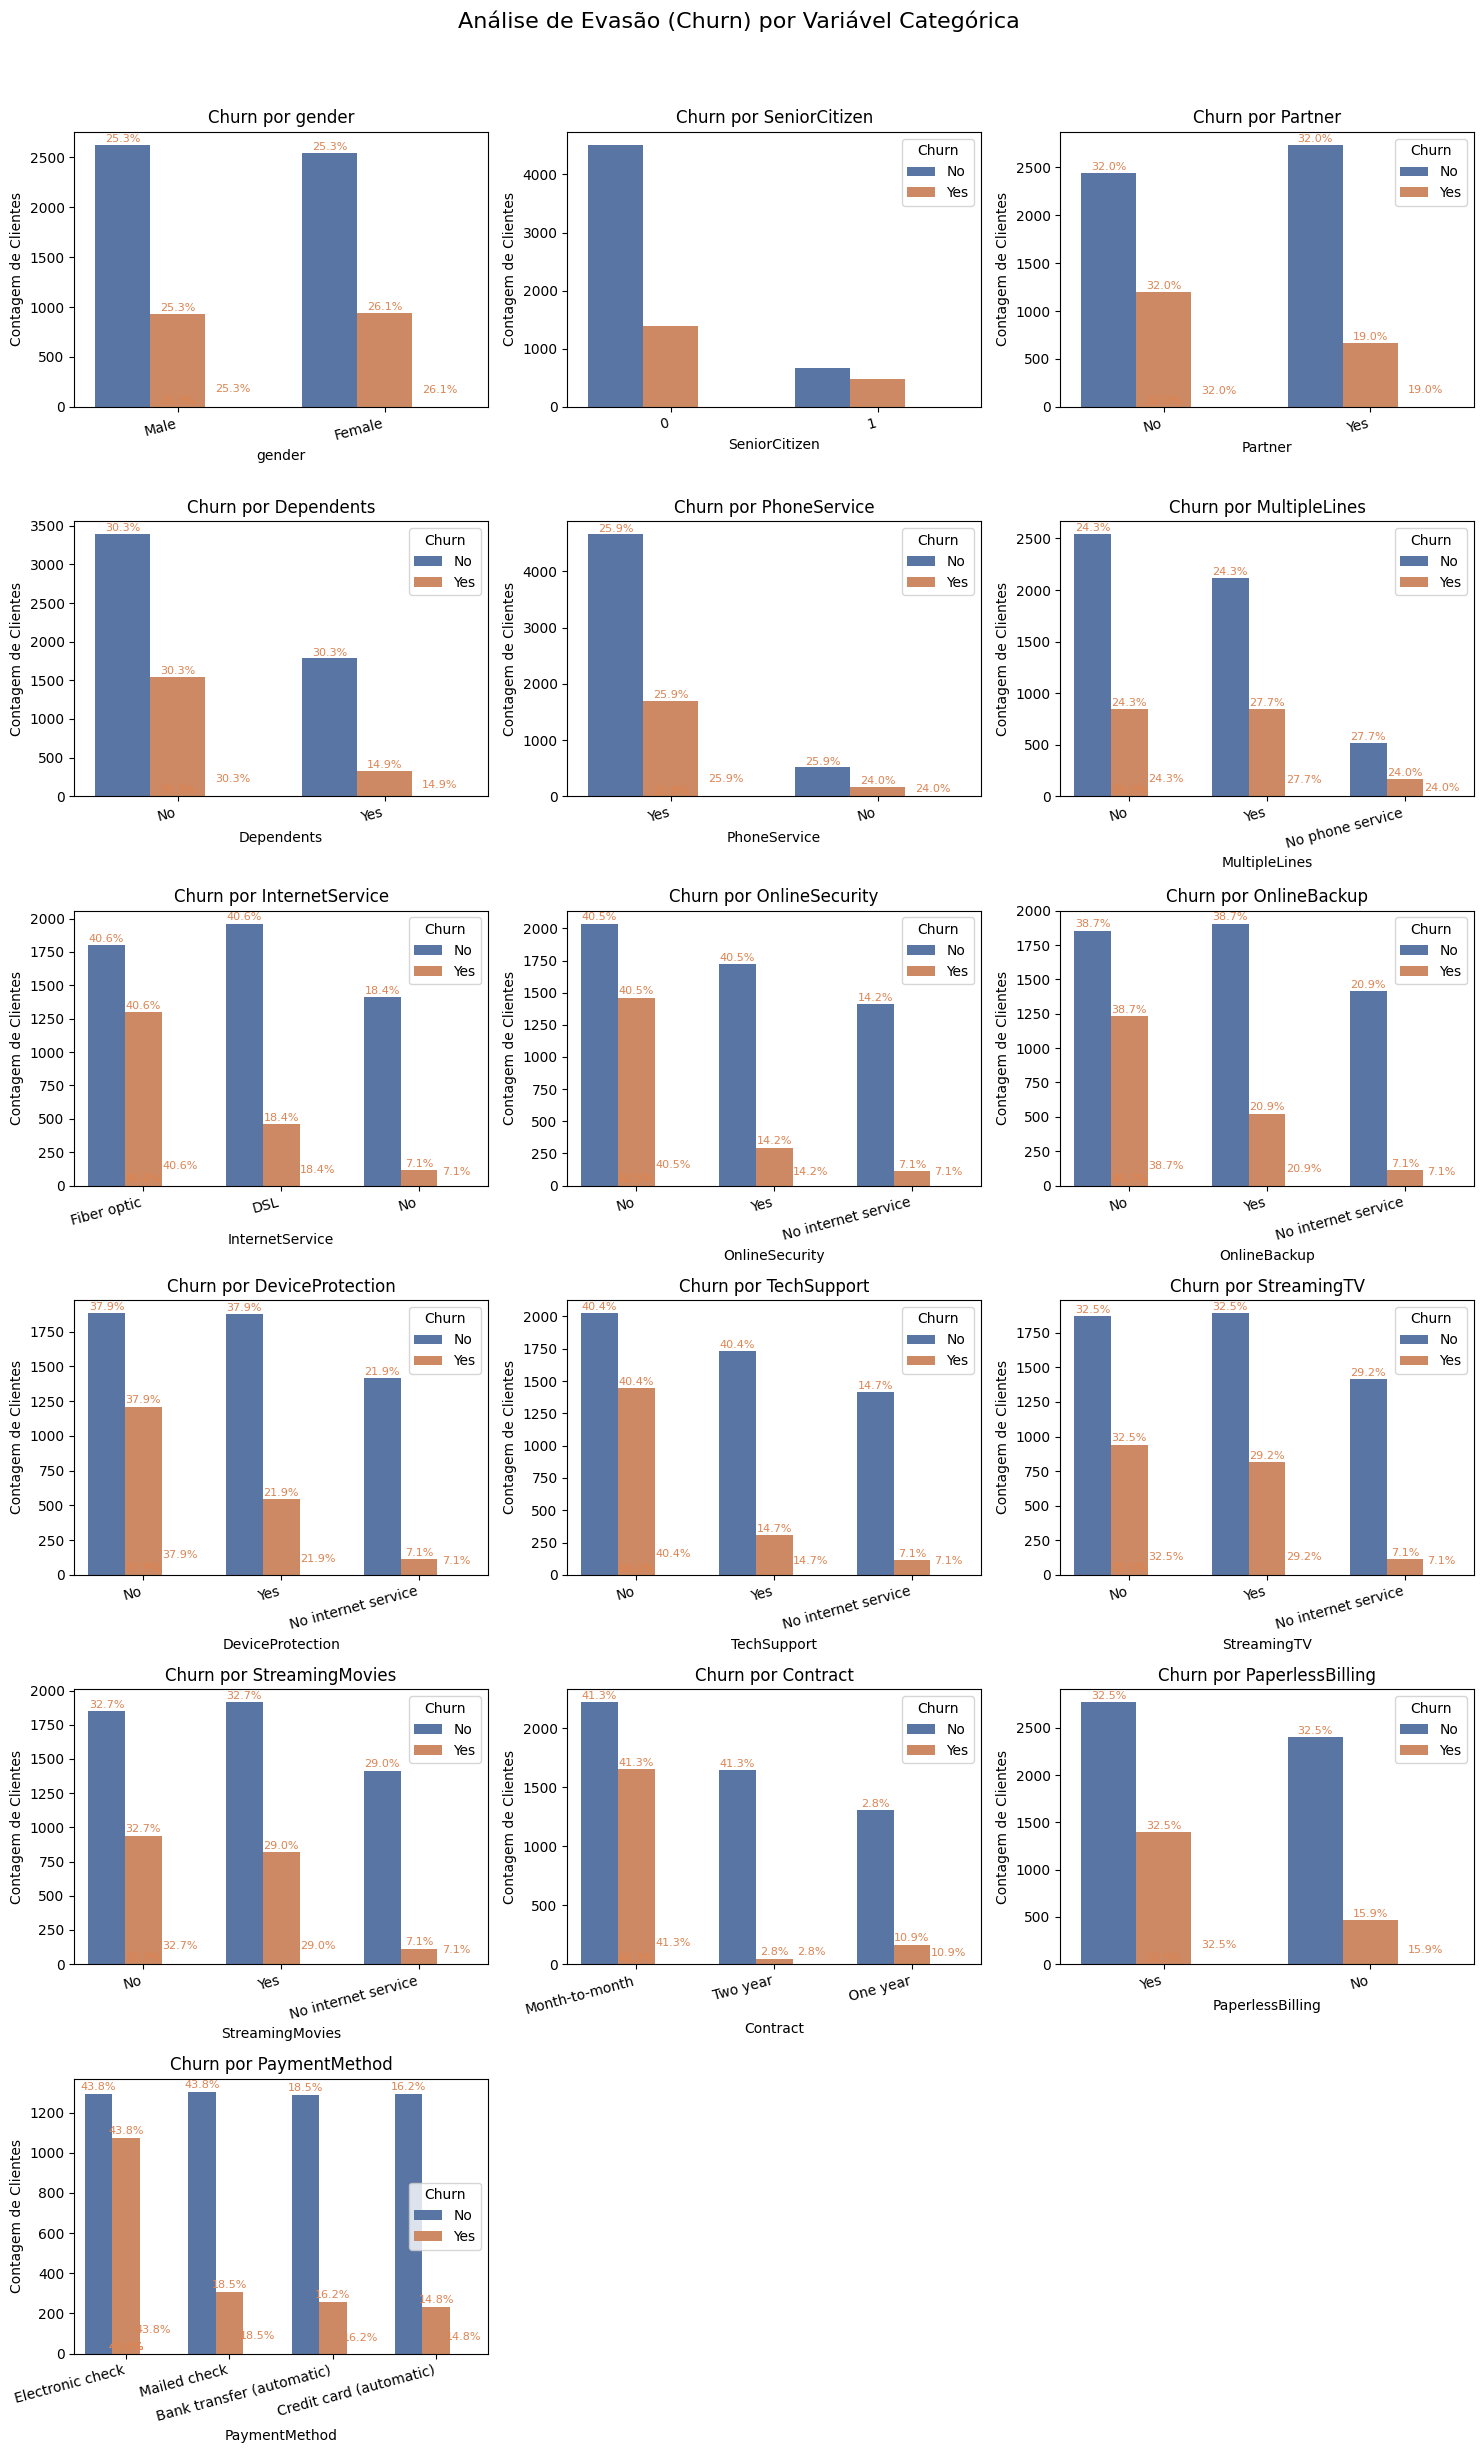

✅ Análise de Evasão por Variáveis Categóricas Concluída.


In [28]:
def plot_churn_rate_categoricas(df, colunas):
    """
    Gera gráficos de barras segmentadas para visualizar a taxa de Churn por categoria.
    Calcula e exibe a taxa de Churn real para cada categoria.
    """

    # Define o número de gráficos por linha
    n_cols = 3
    n_rows = (len(colunas) + n_cols - 1) // n_cols

    plt.figure(figsize=(5 * n_cols, 4 * n_rows))
    plt.suptitle('Análise de Evasão (Churn) por Variável Categórica', fontsize=16, y=1.02)

    for i, col in enumerate(colunas):
        plt.subplot(n_rows, n_cols, i + 1)

        # Cria o gráfico de barras segmentadas
        ax = sns.countplot(
            x=col,
            hue='Churn',
            data=df,
            palette={'No': '#4c72b0', 'Yes': '#dd8452'}, # Azul para 'No', Laranja para 'Yes'
            order=df[col].value_counts().index # Ordena pela contagem total
        )

        plt.title(f'Churn por {col.split(".")[-1]}', fontsize=12)
        plt.xlabel(col.split(".")[-1], fontsize=10)
        plt.ylabel('Contagem de Clientes', fontsize=10)
        plt.xticks(rotation=15, ha='right')

        # Oculta a legenda do eixo x para o customer.gender, pois está muito verboso
        if 'gender' in col:
             ax.legend().set_visible(False)

        # ----------------------------------------------------
        # Cálculo da Taxa de Churn para Insight
        # ----------------------------------------------------

        # Tabela cruzada: Churn vs. Categoria (com normalização ao longo da Categoria)
        # Multiplica por 100 para ter a porcentagem
        churn_rate_table = pd.crosstab(
            df[col],
            df['Churn'],
            normalize='index'
        )['Yes'] * 100

        # Adiciona a taxa de churn (Yes) como anotação acima da barra
        for patch in ax.patches:
            if ax.get_legend() is not None and ax.get_legend().get_texts()[1].get_text() == 'Yes': # Verifica se é a barra 'Yes'

                # Encontra o valor da categoria no eixo x
                categoria = patch.get_x() + patch.get_width() / 2
                x_val = patch.get_x() + patch.get_width() / 2
                height = patch.get_height()

                # Acha a categoria mais próxima do centro da barra
                # Utilizamos o índice para fazer a busca correta
                categoria_label = ax.get_xticklabels()[int(categoria)].get_text()

                # Busca a taxa de churn na tabela calculada
                if categoria_label in churn_rate_table.index:
                    taxa = churn_rate_table.loc[categoria_label]

                    # Coloca o texto da taxa de churn (%)
                    ax.text(x_val, height + 10, f'{taxa:.1f}%', ha='center', va='bottom', fontsize=8, color='#dd8452')


    plt.tight_layout()
    plt.show()


# 3. Execução da Análise
plot_churn_rate_categoricas(df_telecom, colunas_categoricas)
print("✅ Análise de Evasão por Variáveis Categóricas Concluída.")

# **8. Contagem de Evasão por Variáveis Numéricas**

### Distribuição das Variáveis Numéricas por Status de Churn ###


/tmp/ipython-input-1102867524.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-1102867524.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-1102867524.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


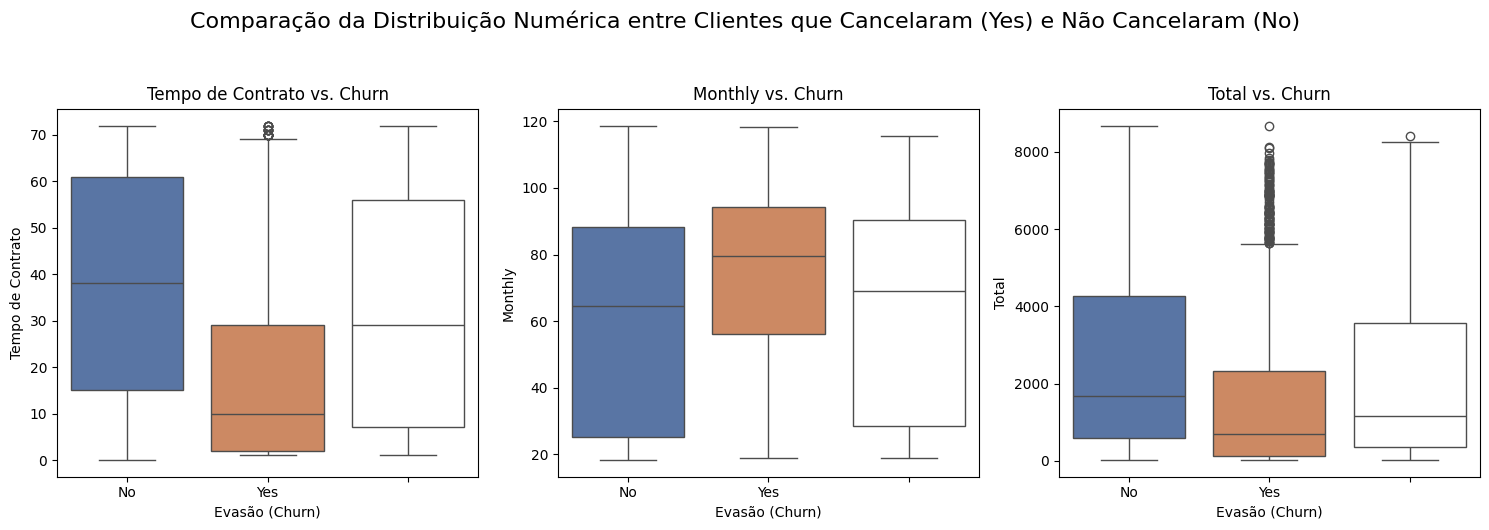

✅ Análise de Distribuição Numérica Concluída.


In [29]:
print("### Distribuição das Variáveis Numéricas por Status de Churn ###")
print("=" * 70)

colunas_numericas_analise = [
    'customer.tenure',
    'account.Charges.Monthly',
    'account.Charges.Total'
]

# Configura o layout dos subplots
plt.figure(figsize=(15, 5))
plt.suptitle('Comparação da Distribuição Numérica entre Clientes que Cancelaram (Yes) e Não Cancelaram (No)', fontsize=16, y=1.05)

for i, col in enumerate(colunas_numericas_analise):
    plt.subplot(1, 3, i + 1)

    # Cria o Box Plot
    sns.boxplot(
        x='Churn',
        y=col,
        data=df_telecom,
        palette={'No': '#4c72b0', 'Yes': '#dd8452'} # Azul para 'No', Laranja para 'Yes'
    )

    # Renomeia os títulos e rótulos para melhor leitura
    titulo = col.split(".")[-1].replace('Charges', 'Gastos').replace('tenure', 'Tempo de Contrato')
    plt.title(f'{titulo} vs. Churn', fontsize=12)
    plt.xlabel('Evasão (Churn)', fontsize=10)
    plt.ylabel(titulo, fontsize=10)

plt.tight_layout()
plt.show()

print("✅ Análise de Distribuição Numérica Concluída.")